In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential

In [3]:
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
train_images = train_images 
test_images = test_images

In [5]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [41]:
base = keras.applications.VGG16(input_shape=(32,32,3),weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [25]:
model = Sequential()

In [26]:
model.add(base)

In [27]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation="softmax"))
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics='accuracy'
    )

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist = model.fit(train_images,train_labels,batch_size=128,epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
391/391 [==============================] - 81s 128ms/step - loss: 2.3202 - accuracy: 0.1200 - val_loss: 1.9293 - val_accuracy: 0.2058
Epoch 2/5
391/391 [==============================] - 48s 122ms/step - loss: 1.7179 - accuracy: 0.3303 - val_loss: 1.5290 - val_accuracy: 0.4106
Epoch 3/5
391/391 [==============================] - 48s 122ms/step - loss: 1.3728 - accuracy: 0.4876 - val_loss: 1.2920 - val_accuracy: 0.5385
Epoch 4/5
391/391 [==============================] - 48s 122ms/step - loss: 1.0908 - accuracy: 0.6057 - val_loss: 0.9952 - val_accuracy: 0.6452
Epoch 5/5
391/391 [==============================] - 47s 121ms/step - loss: 0.9170 - accuracy: 0.6738 - val_loss: 0.9988 - val_accuracy: 0.6475


In [30]:
agu=[]
for i in train_images:
  image=np.fliplr(i)
  agu.append(image)

In [31]:
a=np.array(agu)

In [32]:
a.shape

(50000, 32, 32, 3)

In [33]:
train_agu = np.concatenate([a, train_images], axis=0)

In [34]:
train_labels_agu = np.concatenate([train_labels, train_labels], axis=0)

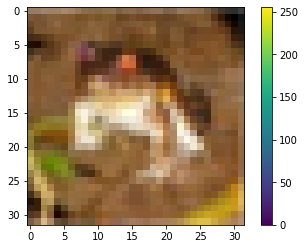

In [35]:
plt.figure()##데이터 그려보기
plt.imshow(train_agu[0])
plt.colorbar()
plt.grid(False)
plt.show()

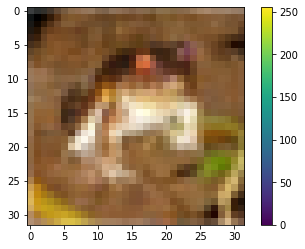

In [36]:
plt.figure()##데이터 그려보기
plt.imshow(train_agu[50000])
plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
hist = model.fit(train_agu,train_labels_agu,batch_size=128,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
782/782 [==============================] - 94s 120ms/step - loss: 0.8038 - accuracy: 0.7216 - val_loss: 0.7936 - val_accuracy: 0.7324
Epoch 2/5
782/782 [==============================] - 92s 118ms/step - loss: 0.6740 - accuracy: 0.7696 - val_loss: 0.7300 - val_accuracy: 0.7541
Epoch 3/5
782/782 [==============================] - 92s 118ms/step - loss: 0.5903 - accuracy: 0.8005 - val_loss: 0.6941 - val_accuracy: 0.7757
Epoch 4/5
782/782 [==============================] - 92s 118ms/step - loss: 0.5201 - accuracy: 0.8255 - val_loss: 0.6466 - val_accuracy: 0.7919
Epoch 5/5
782/782 [==============================] - 92s 118ms/step - loss: 0.4724 - accuracy: 0.8418 - val_loss: 0.6487 - val_accuracy: 0.7891
